# Importing libraries and loading the dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models #provides functions for building and working with neural networks
import matplotlib.pyplot as plt
import numpy as np

data = '/Users/rohanshenoy/Downloads/A,B,CNNS_with_Tim/veggie_heap_training'
test = '/Users/rohanshenoy/Downloads/A,B,CNNS_with_Tim/veggie_heap_testing'

# splitting training data into training and validation subsets to validate training data

In [3]:
#performing batching, ie training the dataset one batch (32 images) at a time
#using this to prevent overfitting
#(it prevents model from memorizing training dataset and instead focuses more on learning features)
train_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="training",
  seed=123, #random seed for splitting of training data into 2 diff subsets
  image_size=(256, 256),
  batch_size=32
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size=32
  )

Found 9835 files belonging to 12 classes.
Using 7868 files for training.
Found 9835 files belonging to 12 classes.
Using 1967 files for validation.


# Storing test dataset

In [4]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
  seed=123,
  image_size=(256,256),
  batch_size=32
)


Found 2424 files belonging to 12 classes.


# Creating an iterator over the training dataset and getting a batch of images and their corresponding labels

In [20]:
image_batch, label_batch = next(iter(train_ds))
class_names = train_ds.class_names


In [32]:
class_names


["Apatosaur Aphie's Apples",
 "Bluplocephalus Bob's Blueberries",
 "Cherizinoasaur Cher's Cherries",
 "Corythosaurus Cory's Corn",
 "Grapthorina Greta's Grapes",
 "Pachycephalosaurus Perry's Peaches",
 "Pepteranodon Pep's Peppers",
 "Potoceratops Pott's Potatoes",
 "Rhaspdodon Ribery's Raspberries",
 "Stribecosaurus Stan's Strawberries",
 "Thyreosaur Tim's Thyme",
 'vacation_photos']

In [33]:
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([ 1,  3,  2,  3,  7,  6,  4,  1,  2,  9,  5,  1,  6,  1,  0,  6,  6,
        3,  3,  6,  4,  2,  1, 10,  6,  5,  6,  6, 11, 10, 11,  2],
      dtype=int32)>

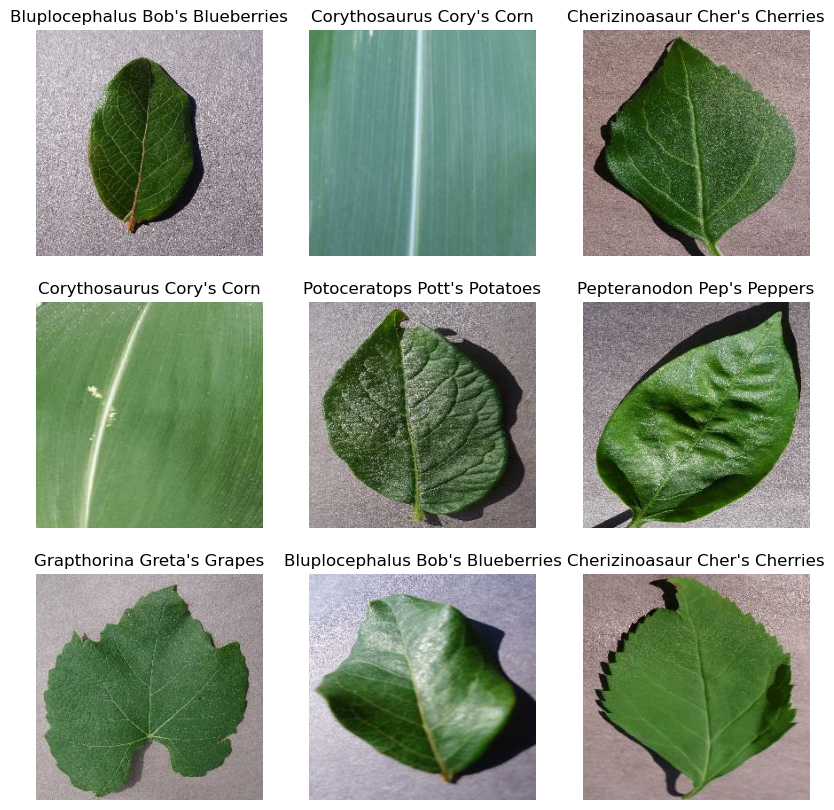

In [21]:
#we inspect the dataset and visualize whether the images and verify whether the images,labels have loaded correctly or not
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")


# CNN model

In [22]:
cnn = models.Sequential([
    
    #rescaling the pixel values b/w [0,1]
    layers.Rescaling(1./255),

    # convolutional layers
    layers.Conv2D(filters = 64, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),

    # dense or fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(12, activation = 'softmax'),
])

# Compiling the model by adding loss fn and performing backpropogation

In [23]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# train of the model on training dataset, we evaluate the performance on the validation dataset

In [24]:
cnn.fit(train_ds,
  validation_data=val_ds,
  epochs=3)


Epoch 1/3
246/246 [==============================] - 327s 1s/step - loss: 0.9126 - accuracy: 0.7031 - val_loss: 0.3897 - val_accuracy: 0.8744
Epoch 2/3
246/246 [==============================] - 352s 1s/step - loss: 0.3306 - accuracy: 0.8957 - val_loss: 0.2190 - val_accuracy: 0.9298
Epoch 3/3
246/246 [==============================] - 419s 2s/step - loss: 0.1974 - accuracy: 0.9375 - val_loss: 0.1922 - val_accuracy: 0.9309


# evaluating the model on the test dataset

In [25]:
loss, accuracy = cnn.evaluate(test_ds)


print(f"loss = {loss}\nAccuracy = {accuracy*100}")

76/76 [==============================] - 21s 273ms/step - loss: 1.7042 - accuracy: 0.6733
loss = 1.7041871547698975
Accuracy = 67.32673048973083


In [26]:
# Get predictions for the test set
y_pred = np.argmax(cnn.predict(test_ds), axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

76/76 [==============================] - 23s 292ms/step


In [27]:
y_pred #the predicted class labels for each image

array([10,  1, 11, ...,  2,  2,  1])

In [28]:
y_true #the actual class labels for each image

array([10,  6,  3, ...,  5,  0, 10], dtype=int32)

# Printing a confusion matrix

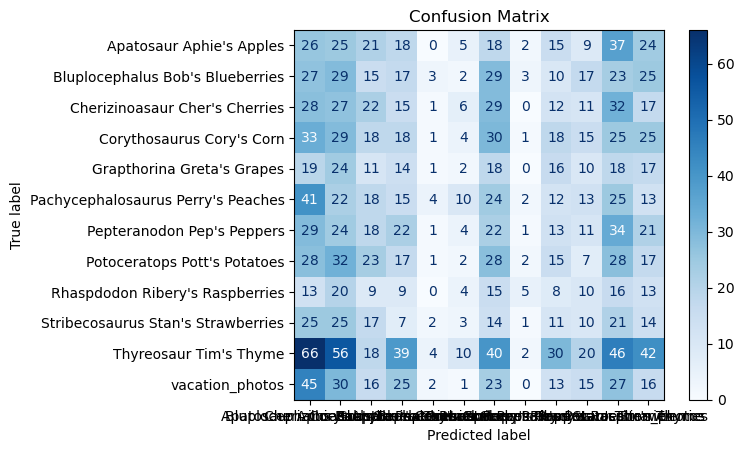

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
